In [74]:
import pandas as pd
import seaborn as sns
%matplotlib inline

**Using power burn data, what is the average power burn by month?**

In [41]:
df = pd.read_csv('powerdata.csv', index_col = 'Date',parse_dates = [0], infer_datetime_format = True)

In [43]:
df['PowerBurn'].resample("M", how='mean')

Date
2011-02-28    12248495.447893
2011-03-31    11498633.375129
2011-04-30    11880321.109533
2011-05-31    12830893.324516
2011-06-30    15572885.743000
2011-07-31    19537446.210323
2011-08-31    19606494.591935
2011-09-30    15900761.777333
2011-10-31    13697136.841290
2011-11-30    13515092.022000
2011-12-31    14761736.845161
2012-01-31    15816463.030323
2012-02-29    16885244.340690
2012-03-31    16194767.099032
2012-04-30    16837218.915000
2012-05-31    18323736.806452
2012-06-30    20670152.981000
2012-07-31    24140384.812581
2012-08-31    22833926.586452
2012-09-30    19711391.877000
2012-10-31    16415999.227097
2012-11-30    14557592.877333
2012-12-31    14458418.501613
2013-01-31    15110251.420323
2013-02-28    15394456.817500
2013-03-31    14431065.894194
2013-04-30    13658059.485333
2013-05-31    14178096.852581
2013-06-30    17189980.545333
2013-07-31    20186943.073226
2013-08-31    19902403.632903
2013-09-30    17474327.495333
2013-10-31    15621356.854516
2013-

**What is the sum of CDD between November 2011 and March 2012?**

In [47]:
df['CDD'].loc[(df.index < '2012-04-01')& (df.index > '2011-10-31')].sum()

152.71935085299992

**Plot the total production on Rex, where total production is the sum of receipts from 'Gathering Company' and 'Processing Plant'.**

In [49]:
# Pull flow data into dataframe
df = pd.read_csv('flow.csv', index_col = 'Date',parse_dates = [0], infer_datetime_format = True)

In [52]:
# Find the appropriate pipeline name
df['Pipeline'].unique()

array(['TETCO', 'TGPL', 'NiS-TCO', 'NCoast', 'REX', 'PEPL', 'TGT', 'EGT',
       'NGO', 'ANR', 'NiS-XRD', 'DOM'], dtype=object)

In [55]:
# Find the appropriate customer type
df['CustomerType'].unique()

array(['Interconnect', 'Production', 'LDC', 'Municipal', 'Compressor',
       'Gathering Company', 'IntraState Connect', 'Processing Plant',
       'Lateral', 'Demand', 'Power Plant', 'End User', 'Constraint',
       'Storage Daily Inj/Withdraw', 'Segment', 'Pipeline Administration',
       'Field Fuel'], dtype=object)

In [69]:
df2 = df[(df.Pipeline == 'REX') &
       (df['CustomerType'].isin(['Gathering Company','Processing Plant','Production']) )]

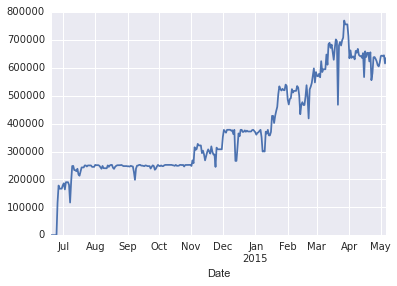

In [75]:
# Plot the REX Zn3 Production
df2['ScheduledVolume'].resample("D", how = 'sum').plot()